In [107]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib


class Camera_app:
    def __init__(self, background_path, sticker_path, model_path='camera_sticker/models/shape_predictor_68_face_landmarks.dat'):
        self.background_path = background_path
        self.sticker_path = sticker_path 
        self.background = self.load_img(background_path)
        self.model = dlib.shape_predictor(model_path)
        self.face_size = self.get_face_size(self.background)
        self.sticker = self.load_img(sticker_path)
        self.landmarks = self.find_landmarks()
        
    def load_img(self, path):
        img = cv2.imread(path)
        img = cv2.resize(img, (640, 480))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    
    
    def show_img(self):
        plt.imshow(self.background)
        plt.show()
        plt.imshow(self.sticker)
        plt.show()
    
    
    def get_face_size(self, img):
        face_detector = dlib.get_frontal_face_detector()
        face_points = face_detector(img, 1)
        if not face_points:
            plt.imshow(img)
            raise ValueError('얼굴 인식이 되지 않습니다. 다른 사진을 넣어주세요.')
        bounding_box = face_points[0]
        l = bounding_box.left()
        t = bounding_box.top()
        r = bounding_box.right()
        b = bounding_box.bottom()
        return (r-l, b-t)
    
    
    def find_landmarks(self):
        detector_hog = dlib.get_frontal_face_detector()
        dlib_rects = detector_hog(self.background, 1)
        landmarks = []
        for dlib_rect in dlib_rects:
            points = self.model(self.background, dlib_rect)
            points = list(map(lambda p: (p.x, p.y), points.parts()))
            return points
    
    
    def add_sticker(self, w_ratio, h_ratio, size_ratio=1):
        # w_ratio: 코 기준 - 얼굴사이즈 비율로 '좌우' 이동
        # h_ratio: 코 기준 - 얼굴사이즈 비율로 '상하' 이동
        # size_ratio: 스티커 크기 비율
        new_img = self.background.copy()
        nose_x, nose_y = self.landmarks[30]
        face_h, face_w = self.face_size
        new_sticker_size = (int(face_h * size_ratio), int(face_w * size_ratio))
        sticker = cv2.resize(self.sticker, new_sticker_size)
        
        h, w, _ = sticker.shape
        
        new_x = nose_x + int(w * w_ratio)
        new_y = nose_y + int(h * h_ratio)
        h0 = max(0, new_y-h//2)
        h1 = min(new_img.shape[0], new_y+h//2)
        
        w0 = max(0, new_x-w//2)
        w1 = min(new_img.shape[1], new_x+w//2)
    
        
        
        sticker_area = new_img[h0:h1, w0:w1]
        if not h0 and not w0:
            sticker = sticker[h0-h1:, w0-w1:]
        elif not h0:
            sticker = sticker[h0-h1:, :w1-w0]
        elif not w0:
            sticker = sticker[:h1-h0, w0-w1:]
        else:
            sticker = sticker[:h1-h0, :w1-w0]
        sticker_area = sticker_area[:sticker.shape[0], :sticker.shape[1]]
        new_img[h0:h1, w0:w1] = np.where(sticker==0, sticker_area, sticker).astype(np.uint8)
        
        plt.imshow(new_img)

## 왕관 스티커

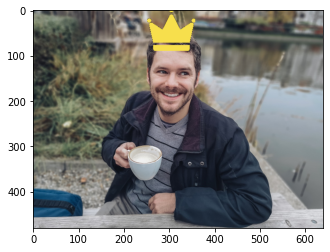

In [108]:
camera = Camera_app('camera_sticker/images/image.png', 'camera_sticker/images/king.png')
camera.add_sticker(0, -1.2)

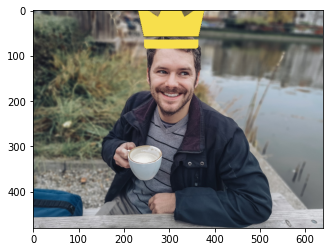

In [112]:
camera = Camera_app('camera_sticker/images/image.png', 'camera_sticker/images/king.png')
camera.add_sticker(0, -1, 1.5)

## 고양이 수염

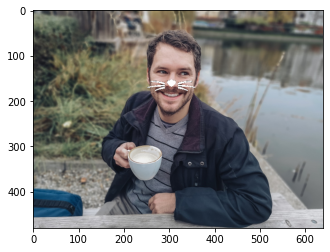

In [79]:
camera = Camera_app('camera_sticker/images/image.png', 'camera_sticker/images/cat4.png')
camera.add_sticker(0, 0)

## 다양한 사진 적용

### 작은 얼굴 크기

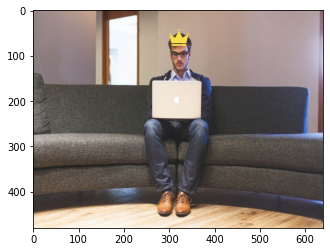

In [80]:
camera = Camera_app('camera_sticker/images/laptop man.jpg', 'camera_sticker/images/king.png')
camera.add_sticker(0, -1.2)

### 밝은 사진

ValueError: 얼굴 인식이 되지 않습니다. 다른 사진을 넣어주세요.

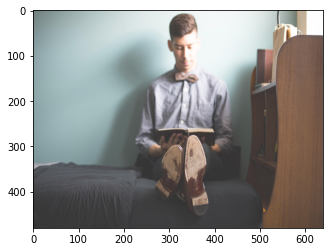

In [81]:
camera = Camera_app('camera_sticker/images/bright man.jpg', 'camera_sticker/images/king.png')
camera.add_sticker(0, -1.2)

### 어두운 사진

ValueError: 얼굴 인식이 되지 않습니다. 다른 사진을 넣어주세요.

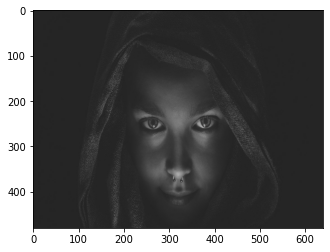

In [83]:
camera = Camera_app('camera_sticker/images/dark woman.jpg', 'camera_sticker/images/king.png')
camera.add_sticker(0, 0)

### 배경이 밝은 사진

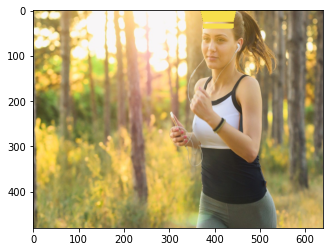

In [89]:
camera = Camera_app('camera_sticker/images/bright woman.jpg', 'camera_sticker/images/king.png')
camera.add_sticker(0.2, -1)